
# **NYC-Automated-Traffic-Volume-Counts**
CPSC 531-01
Advance Database Management Instructor- Tseng-Ching James Shen, PhD


1.Pratishtha Soni 

2.Saurabh Jain




Here I am Importing Data from my Bucket Where I have Stored my Data and Here is the access link on data :["gs://nyctraffice/Automated_Traffic_Volume_Counts.csv"](https://)

In [ ]:
db1 = spark.read.csv("gs://nyctraffice/Automated_Traffic_Volume_Counts.csv",header=True)

In [ ]:
db1.show()

+---------+-------------+----+---+---+---+---+---+---------+--------------------+--------------------+--------------------+--------------------+---------+
|RequestID|         Boro|  Yr|  M|  D| HH| MM|Vol|SegmentID|             WktGeom|              street|              fromSt|                toSt|Direction|
+---------+-------------+----+---+---+---+---+---+---------+--------------------+--------------------+--------------------+--------------------+---------+
|    20856|       Queens|2015|  6| 23| 23| 30|  9|   171896|POINT (1052296.60...|           94 AVENUE|          207 Street|Francis Lewis Bou...|       WB|
|    21231|Staten Island|2015|  9| 14|  4| 15|  6|     9896|POINT (942668.058...|    RICHMOND TERRACE|       Wright Avenue|        Emeric Court|       WB|
|    29279|        Bronx|2017| 10| 19|  4| 30| 85|    77817|POINT (1016508.00...|  HUNTS POINT AVENUE|     Whittier Street|      Randall Avenue|       NB|
|    27019|     Brooklyn|2017| 11|  7| 18| 30|168|   188023|POINT (992

In [ ]:
db1.count()

27190511

Here is my data table:
NYC Automated Traffic Count allows the user to view and access traffic data information of different cities in NYC. The information is displayed in the form of excel. New York City transportation uses automated traffic recorders to collect traffic volume counts at bridge crossings and roadways. The data consists of cars volume, averaged of every 15 mins for the duration of  2000 -2020. This traffic data can be used to determine various type of analysis and design patterns in traffic over the 20 year.

The information is collected from Kaggle in a form of 1 excel file and consists of 14 rows and 27190511 columns

**Rows are:**

RequestID - unique ID that is generated for each counts request.

Boro - Lists which of the five administrative divisions of New York City the location is within, written as a word. Where Brooklyn data is 29% and Queens data is 26%.

Yr - The two-digit year portion of the date when the count was conducted. (From 2000 to 2020)

M - The two-digit month portion of the date when the count was conducted.

D - The two-digit day portion of the date when the count was conducted.

HH - The two-digit hour portion of the time when the count was conducted.

MM - The two digits start minute portion of the time when the count was conducted.

Vol - The total sum of count collected within a 15-minute increments.

SegmentID - The ID that identifies each segment of a street in the LION street network version 14.

WktGeom - A text markup language for representing vector geometry objects on a map and spatial reference systems of spatial objects.

Street - The 'On Street' where the count took place.

fromSt - The 'From Street' where the count took place.

toSt - The 'To Street' where the count took place.

Direction - The text-based direction of traffic where the count took place.

In [ ]:
trips_db2=db1.select('Boro','Vol')

In [ ]:
trips_db2.show()

+-------------+---+
|         Boro|Vol|
+-------------+---+
|       Queens|  9|
|Staten Island|  6|
|        Bronx| 85|
|     Brooklyn|168|
|    Manhattan|355|
|        Bronx| 11|
|    Manhattan| 99|
|       Queens|232|
|       Queens| 18|
|        Bronx|  2|
|        Bronx| 20|
|        Bronx| 33|
|    Manhattan|727|
|        Bronx| 89|
|Staten Island|  6|
|       Queens|332|
|     Brooklyn|  9|
|     Brooklyn|119|
|     Brooklyn|125|
|       Queens| 20|
+-------------+---+
only showing top 20 rows



Here Iam write that data in my Bucket so that I can use that data for Vizulization.
And Hadoop Spark Divide that file in to mutilple files and if we want to use that data we just have to use the Access URl and use as single data file.

In [ ]:
trips_db2.write.save("gs://nyctraffice/trips_df2.csv",format='csv',header=True)

In [ ]:
db1.createOrReplaceTempView("trips_db2")

In [ ]:
Vol_perMin=spark.sql("select Boro,Vol/15 as Vol_perMin from trips_db2").show()

+-------------+-------------------+
|         Boro|         Vol_perMin|
+-------------+-------------------+
|       Queens|                0.6|
|Staten Island|                0.4|
|        Bronx|  5.666666666666667|
|     Brooklyn|               11.2|
|    Manhattan| 23.666666666666668|
|        Bronx| 0.7333333333333333|
|    Manhattan|                6.6|
|       Queens| 15.466666666666667|
|       Queens|                1.2|
|        Bronx|0.13333333333333333|
|        Bronx| 1.3333333333333333|
|        Bronx|                2.2|
|    Manhattan|  48.46666666666667|
|        Bronx|  5.933333333333334|
|Staten Island|                0.4|
|       Queens| 22.133333333333333|
|     Brooklyn|                0.6|
|     Brooklyn|  7.933333333333334|
|     Brooklyn|  8.333333333333334|
|       Queens| 1.3333333333333333|
+-------------+-------------------+
only showing top 20 rows



Here I am make Descending order of our data on the Year Basis to find how the number of Traffic count change over the Year

In [ ]:
ordering =spark.sql("select * from trips_db2 order by Yr DESC").show()

+---------+-------------+----+---+---+---+---+---+---------+--------------------+--------------------+--------------------+--------------------+---------+
|RequestID|         Boro|  Yr|  M|  D| HH| MM|Vol|SegmentID|             WktGeom|              street|              fromSt|                toSt|Direction|
+---------+-------------+----+---+---+---+---+---+---------+--------------------+--------------------+--------------------+--------------------+---------+
|    32417|       Queens|2020| 11| 21| 17| 15| 65|    76510|POINT (1017222.13...|           31 AVENUE|           87 Street|           88 Street|       WB|
|    31781|Staten Island|2020|  1| 25| 20|  0|116|     7453|POINT (948899.888...|       RICHMOND ROAD|     Rockland Avenue|       Morley Avenue|       SB|
|    32417|       Queens|2020| 10| 11| 11|  0|306|   157298|POINT (1029961.81...|  NORTHERN BOULEVARD|College Point Bou...|            Dead end|       WB|
|    32384|    Manhattan|2020| 10| 31|  8| 30|348|    36375|POINT (994

Here I am make Ascending orderorder of our data on the Year Basis to find how the number of Traffic count change over the Year

In [ ]:
ordering2 =spark.sql("select * from trips_db2 order by Yr ASC").show()

+---------+-------------+----+---+---+---+---+---+---------+--------------------+--------------------+----------------+----------------+---------+
|RequestID|         Boro|  Yr|  M|  D| HH| MM|Vol|SegmentID|             WktGeom|              street|          fromSt|            toSt|Direction|
+---------+-------------+----+---+---+---+---+---+---------+--------------------+--------------------+----------------+----------------+---------+
|     2276|    Manhattan|2000|  1|  3|  6| 15|172|    32956|POINT (986884.7 2...|W/B UNION SQUARE ...|E 14 ST/BROADWAY|            4 AV|       WB|
|     2276|    Manhattan|2000|  1|  7| 14| 15|253|    32956|POINT (986884.7 2...|W/B UNION SQUARE ...|E 14 ST/BROADWAY|            4 AV|       WB|
|     7513|Staten Island|2000|  1|  2| 13| 30| 32|   138673|POINT (962968.1 1...|N/B STEUBEN ST @ ...|   WINDERMERE RD|W FINGERBOARD RD|       NB|
|     7513|Staten Island|2000|  1| 11| 23|  0| 74|   138673|POINT (962968.1 1...|N/B STEUBEN ST @ ...|   WINDERMERE RD

In [ ]:
db1.groupby("Boro").count().show()

+-------------+-------+
|         Boro|  count|
+-------------+-------+
|       Queens|6980516|
|     Brooklyn|7995056|
|Staten Island|1559298|
|    Manhattan|6099522|
|        Bronx|4556119|
+-------------+-------+



Here if we want to make a vizulatization we have to use Pandas in python.

Here I have Import and convert spark dataframe in to Pandas.

In [ ]:
import pandas as pd
print(db1)
df = pd.DataFrame(db1)
print(df)

# Analysis/Queries used in dataset:

Variation in Volume of data/vehicle: After pre-processing, main analysis of this traffic dataset shows number of increases of volume in cars from year 2000 to 2020. (Queries being displayed in the implementation section)

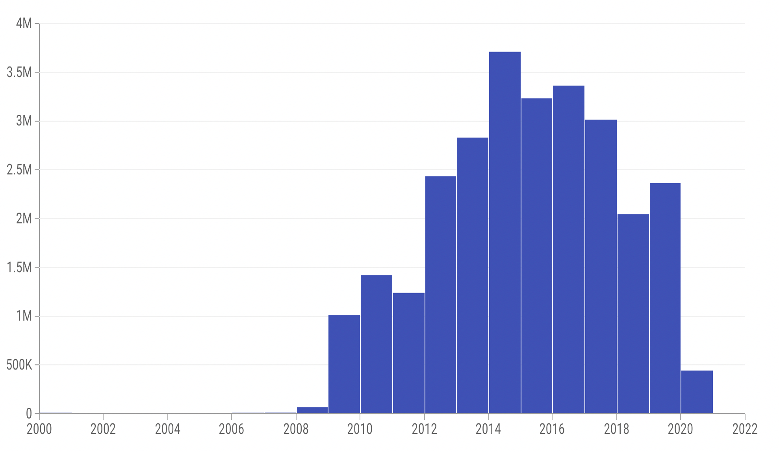

Busiest Cities of NYC: After pre-processing and running queries and we extracted top 3 busiest cities and, it is found that Brooklyn is the most crowded and busiest city with count of vehicles (7,995,056, 29%), Queens being the 2nd busiest (6,980,516, 26%) and Manhattan being the 3rd busiest (6,099,052, 22%). 

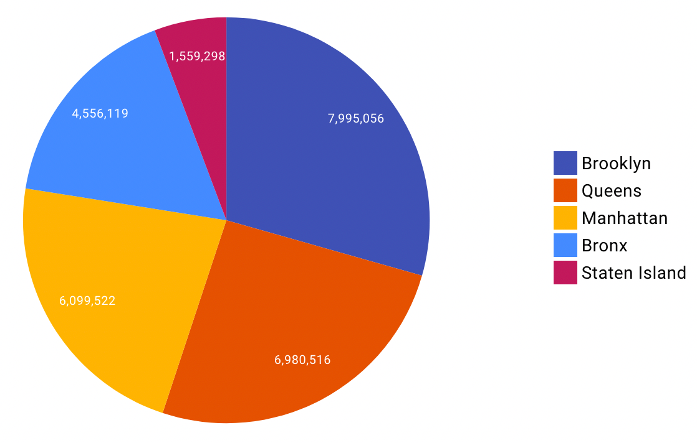

 Most visited streets: From the dataset, we found the most visited and busiest street in different cities in NYC. 

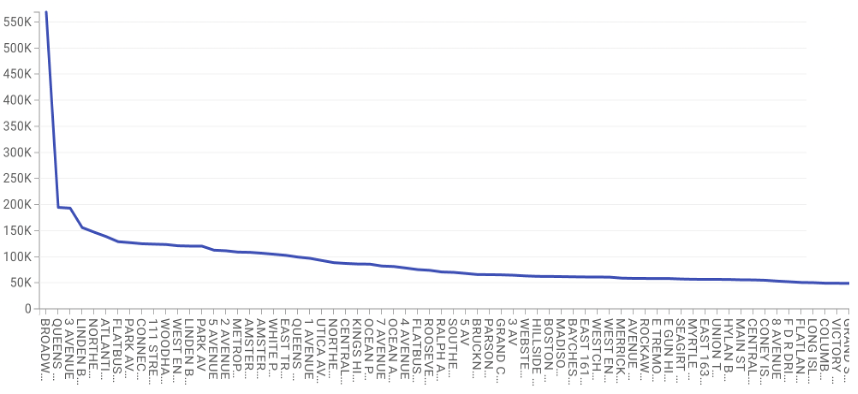



1.    Volume of car increased in every 15 mins in New York: This query displays the how many numbers of cars increased city of Boro.
2.    Grouped according to Busiest Month in the year of different Cities: By applying group by, sorting and count query we found that the October 
being the busiest month in the Manhattan in the entire year. 



1st pie chart shows the number distribution according to month.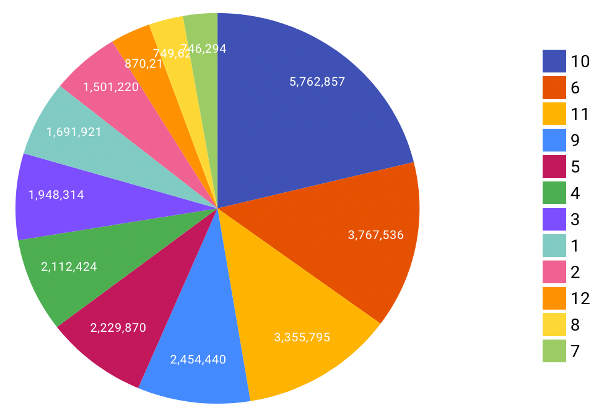

2nd pie chart shows the busiest city according to the month.
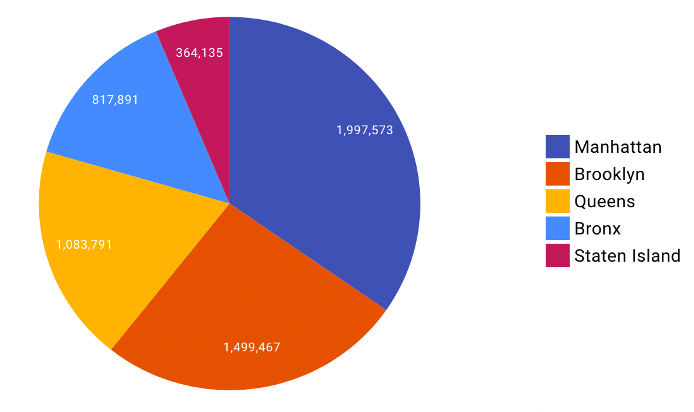